In [1]:
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
#%matplotlib notebook

In [2]:
# you can access the files as named or use the aliases in __init__.py to keep it shorter 
# for example, these are the same:

gizmo.gizmo_io
gizmo.io

<module 'gizmo_analysis.gizmo_io' from 'C:\\Users\\binod\\gizmo_analysis\\gizmo_io.py'>

In [3]:
simname=''
simdir='C:\\Users\\binod\\m12i.res57000'
part = gizmo.io.Read.read_snapshots(['star'],'snapshot_index', 600, assign_hosts=True, assign_hosts_rotation=True , simulation_name=simname, simulation_directory=simdir+simname)



# in utilities.simulation.Snapshot():
* reading:  C:\Users\binod\m12i.res57000/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 8820344 particles
    dark2     (id = 2): 3081337 particles
    gas       (id = 0): 5969934 particles
    star      (id = 4): 3059250 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5

! cannot find MUSIC config file:  C:\Users\binod\m12i.res57000/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

  cannot read file containing hosts coordinates
  instead will assign hosts via iterative

In [4]:
# properties of star particles are stored via dictionary

part['star'].keys()

dict_keys(['position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [5]:
# 3-D position of star particle (particle number x dimension number) [kpc comoving]

starposition=part['star']['position']
star_age=part['star'].prop('age')
iron=part['star'].prop('metallicity.fe')

print ("This is the array of position of all stars",starposition)
print ("This is the array of age of all stars",star_age)
print ("This is the metallicity of the stars [Fe/H] ",iron)
xall = part['star'].prop('host.distance.principal')[:,0]   
yall = part['star'].prop('host.distance.principal')[:,1]
zall = part['star'].prop('host.distance.principal')[:,2]
print("Total no of star particles is",len(xall))

r = np.sqrt(xall**2 + yall**2 + zall**2)
print("The values of r is",r)
#keep=np.where((r<3.5) & ((star_age>=0)&(star_age<=9))&(iron>=0.7))
#keep=np.where(((r>=7)&(r<=9)))
keep=np.where((r<0.3))
#keep=np.where((r<3.5) & ((star_age>=0)&(star_age<=9))&(iron>=0.7))

print("The indices that satisfy our conditon are",keep)

x=xall[keep]
y=yall[keep]
z=zall[keep]

print("Total no of particles that stasfies our condition is",len(x))

           

This is the array of position of all stars [[43090.80575884 49686.35374503 41360.34283508]
 [44928.29340924 46498.85693528 41973.80607722]
 [44165.06982706 45905.57328081 47149.21746307]
 ...
 [41959.19387506 42547.66435227 46108.83355536]
 [41959.30623868 42547.42814527 46108.97969497]
 [41959.30737559 42547.08535602 46108.55536859]]
This is the array of age of all stars [ 8.41417958  6.44265669  8.42417513 ...  3.3380273   9.24289511
 10.59347525]
This is the metallicity of the stars [Fe/H]  [-0.17933045 -0.50825423 -0.8722403  ... -0.65306526 -1.1448423
 -1.2553716 ]
Total no of star particles is 3059250
The values of r is [7540.43358198 5823.640359   3067.92099375 ... 1590.48384872 1590.71086081
 1591.09819155]
The indices that satisfy our conditon are (array([ 281029,  281030,  281031, ..., 1486433, 1486438, 1486531],
      dtype=int64),)
Total no of particles that stasfies our condition is 49233


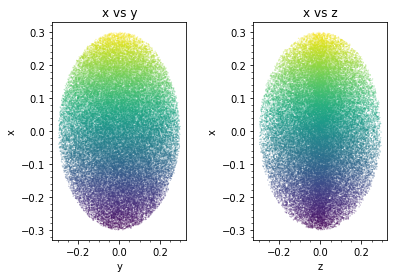

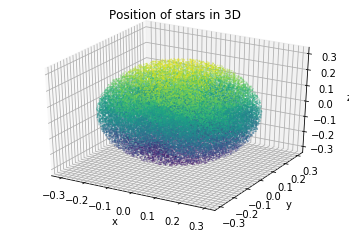

In [8]:

fig1=plt.figure()
ax1=fig1.add_subplot(121)
ax1.scatter(y,x,marker=".",s=0.1,c=x) #s determines the size of the dot. c determines the no. of colors you want for dot
ax1.set_xlabel('y')
ax1.set_ylabel('x')
ax1.set_title('x vs y')
ax1.minorticks_on()
plt.subplots_adjust(wspace=0.5)

ax2=fig1.add_subplot(122)
ax2.scatter(z,x,marker=".",s=0.1,c=x)
ax2.set_xlabel('z')
ax2.set_ylabel('x')
ax2.set_title('x vs z')
ax2.minorticks_on()

fig1.savefig("./plots/positionplots.png")

fig2 = plt.figure()
ax3 = fig2.add_subplot(111, projection='3d')
ax3.scatter(x,y,z,c=z,s=0.1)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Position of stars in 3D')
ax3.minorticks_on()
fig2.savefig("./plots/positionplots3d.png")


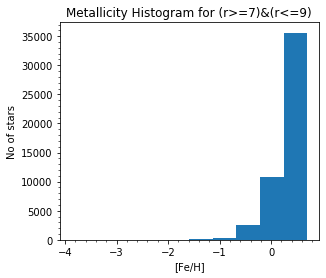

In [9]:
plt.close('all')
sample_test_age=star_age[keep]
sample_test_iron=iron[keep]

fig3 = plt.figure()

ax5 = fig3.add_subplot(111)
ax5.hist(sample_test_iron)
ax5.set_xlabel('[Fe/H]')
ax5.set_ylabel('No of stars')
ax5.set_title('Metallicity Histogram for (r>=7)&(r<=9)')
ax5.minorticks_on()
plt.subplots_adjust(left=0.3)
#plt.figtext(0.5,0.007,"This is the plot where (r<3.5) & ((star_age>=0)&(star_age<=9))&(iron>=0.7) ")
fig3.savefig("./plots/metallicity_for_r_less_than_9_and_greater_than_7.png")
